In [ ]:
#important libaries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

test = pd.read_csv('/content/test.csv')
submit = pd.read_csv('/content/submit.csv')
train = pd.read_csv('/content/train.csv')

# Concatenate the dataframes
fakenews = pd.concat([train, test, submit], ignore_index=True)

fakenews.to_csv('/content/fakenews.csv', index=False)

print("Concatenation complete. The result is saved to 'fakenews.csv'.")

<ipython-input-6-e61008b75993>:3: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275

Concatenation complete. The result is saved to 'fakenews.csv'.


In [ ]:
fakenews =pd.read_csv('fakenews.csv')

<ipython-input-7-45b8336314b7>:1: DtypeWarning: Columns (0,1,2,3,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,2

In [ ]:
fakenews.head()

,id,title,author,text,label,2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 737,Unnamed: 738,Unnamed: 739,Unnamed: 740,Unnamed: 741,Unnamed: 742,Unnamed: 743,Unnamed: 744,Unnamed: 745,Unnamed: 746
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# kept columns
columns_to_keep = ['label', 'text', 'author', 'title', 'id']

fakenews = fakenews[columns_to_keep]

fakenews.to_csv('fakenews.csv',index=False)

In [ ]:
fakenews.head()

,label,text,author,title,id
0,1.0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0
1,0.0,Ever get the feeling your life circles the rou...,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",1
2,1.0,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com,Why the Truth Might Get You Fired,2
3,1.0,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,3
4,1.0,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy,Iranian woman jailed for fictional unpublished...,4


In [ ]:
fakenews.isnull().sum()

,0
label,5880
text,5668
author,7986
title,6091
id,1


In [ ]:
fakenews.dropna(inplace=True)
fakenews.isnull().sum()

,0
label,0
text,0
author,0
title,0
id,0


In [ ]:
fakenews['label'] = fakenews['label'].astype(int)

In [ ]:
fakenews.duplicated().sum()

0

In [ ]:
fakenews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   18285 non-null  int64 
 1   text    18285 non-null  object
 2   author  18285 non-null  object
 3   title   18285 non-null  object
 4   id      18285 non-null  object
dtypes: int64(1), object(4)
memory usage: 857.1+ KB


In [ ]:
fakenews.shape

(18285, 5)

pre

In [ ]:
print(f"label value count: \n {fakenews['label'].value_counts()}")

label value count: 
 label
0    10361
1     7924
Name: count, dtype: int64


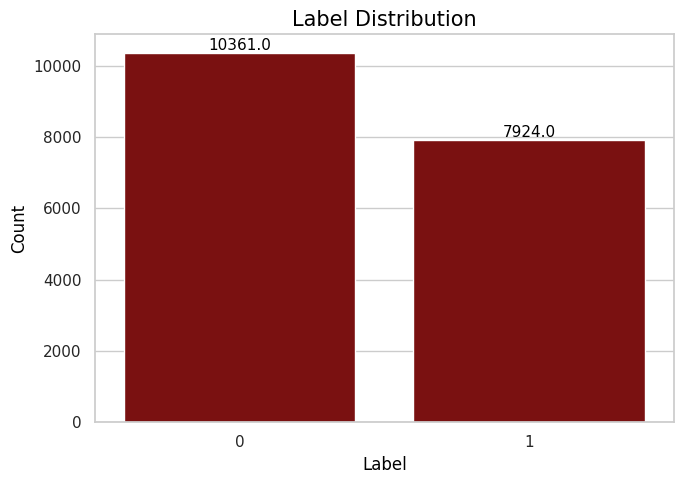

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["darkred", "darkblue"]

sns.set(style="whitegrid", palette=custom_palette)

# Create the plot
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="label", data=fakenews, ax=ax)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11,
                color='black', xytext=(0, 5), textcoords='offset points')

ax.set_xlabel("Label", fontsize=12, color='black')
ax.set_ylabel("Count", fontsize=12, color='black')
ax.set_title("Label Distribution", fontsize=15, color='black')


plt.tight_layout()
plt.show()

data preprocessing

In [ ]:
fakenews['content'] = fakenews['author']+' '+fakenews['title']
print(fakenews['content'])# جمع الكاتب و العنوان

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 18285, dtype: object


In [ ]:
# Convert the 'text' column to string type before using .str accessor
train['text'] = train['text'].astype(str).str.strip().str.lower()

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def clean_text(text: str, advanced: bool = False) -> str:
    # lower case
    text = text.lower()

    # remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # remove nummbers
    text = re.sub(r"\b\d+\b", "", text)

    # symblos
    text = re.sub('<.*?>+', '', text)

    # إزالة علامات الترقيم
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    #    ’“”…
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # إزالة الرموز التعبيرية
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # معالجة النص
    if advanced:
        text = remove_mentions_and_hashtags(text)
        text = expand_contractions(text)
        text = remove_extra_whitespaces(text)
        text = tokenize_and_lemmatize(text)

    return text

def remove_mentions_and_hashtags(text: str) -> str:
    return re.sub(r'[@#]\S+', ' ', text)

def expand_contractions(text: str) -> str:
    contractions = {"don't": 'do not', "can't": 'cannot'}
    for contraction, expanded in contractions.items():
        text = text.replace(contraction, expanded)
    return text

def remove_extra_whitespaces(text: str) -> str:
    return re.sub('\s{2,}', ' ', text)

def tokenize_and_lemmatize(text: str) -> str:
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    stopwords_set = set(stopwords.words('english'))
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_set]
    return ' '.join(lemmatized_words)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
fakenews_cleand = fakenews['text'].apply(clean_text) # Applying the 'clean_text' function to clean the 'text' column of the 'fakenews' DataFrame.
# The original code used 'clean_text2', which was not defined. This has been corrected to 'clean_text'.

fakenews_cleand = fakenews_cleand.to_frame(name='cleaned_text')

# Now apply the stop word removal to the 'cleaned_text' column
fakenews_cleand['no_sw'] = fakenews_cleand['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
fakenews_cleand

,cleaned_text,no_sw
0,house dem aide we didnt even see comeys letter...,house aide comeys letter jason chaffetz tweete...
1,ever get the feeling your life circles the rou...,feeling life circles roundabout heads straight...
2,why the truth might get you fired october th...,truth fired october tension intelligence analy...
3,videos civilians killed in single us airstrik...,videos civilians killed single airstrike ident...
4,print an iranian woman has been sentenced to s...,print iranian woman sentenced years prison ira...
...,...,...
20795,rapper t i unloaded on black celebrities who m...,rapper unloaded black celebrities donald trump...
20796,when the green bay packers lost to the washing...,green bay packers lost washington redskins wee...
20797,the macys of today grew from the union of seve...,macys today grew union great names american re...
20798,nato russia to hold parallel exercises in balk...,nato russia hold parallel exercises balkans pr...


In [ ]:
#Working with the most Frequent Words:
from collections import Counter
cnt = Counter()
for text in fakenews_cleand["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,mr,65972
1,—,45456
2,trump,41770
3,president,21881
4,clinton,19930
5,time,19105
6,years,17656
7,state,17452
8,states,17394
9,american,14579


In [ ]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# Apply the function to the 'no_sw' column in the 'fakenews_cleand' DataFrame
fakenews_cleand["wo_stopfreq"] = fakenews_cleand["no_sw"].apply(lambda text: remove_freqwords(text))

# If you need this column in the original 'fakenews' DataFrame, you can merge or assign it:
fakenews = fakenews.merge(fakenews_cleand[['wo_stopfreq']], left_index=True, right_index=True)
# or
# fakenews['wo_stopfreq'] = fakenews_cleand['wo_stopfreq']

fakenews.head()

,label,text,author,title,id,content,wo_stopfreq
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,0,Darrell Lucus House Dem Aide: We Didn’t Even S...,house aide comeys letter jason chaffetz tweete...
1,0,Ever get the feeling your life circles the rou...,Daniel J. Flynn,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",1,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",feeling life circles roundabout heads straight...
2,1,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com,Why the Truth Might Get You Fired,2,Consortiumnews.com Why the Truth Might Get You...,truth fired october tension intelligence analy...
3,1,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss,15 Civilians Killed In Single US Airstrike Hav...,3,Jessica Purkiss 15 Civilians Killed In Single ...,videos civilians killed single airstrike ident...
4,1,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy,Iranian woman jailed for fictional unpublished...,4,Howard Portnoy Iranian woman jailed for fictio...,print iranian woman sentenced prison irans rev...


In [ ]:
wordnet_lem = WordNetLemmatizer()

fakenews_cleand['wo_stopfreq_lem'] = fakenews_cleand['wo_stopfreq'].apply(wordnet_lem.lemmatize)
fakenews_cleand

,cleaned_text,no_sw,wo_stopfreq,wo_stopfreq_lem
0,house dem aide we didnt even see comeys letter...,house aide comeys letter jason chaffetz tweete...,house aide comeys letter jason chaffetz tweete...,house aide comeys letter jason chaffetz tweete...
1,ever get the feeling your life circles the rou...,feeling life circles roundabout heads straight...,feeling life circles roundabout heads straight...,feeling life circles roundabout heads straight...
2,why the truth might get you fired october th...,truth fired october tension intelligence analy...,truth fired october tension intelligence analy...,truth fired october tension intelligence analy...
3,videos civilians killed in single us airstrik...,videos civilians killed single airstrike ident...,videos civilians killed single airstrike ident...,videos civilians killed single airstrike ident...
4,print an iranian woman has been sentenced to s...,print iranian woman sentenced years prison ira...,print iranian woman sentenced prison irans rev...,print iranian woman sentenced prison irans rev...
...,...,...,...,...
20795,rapper t i unloaded on black celebrities who m...,rapper unloaded black celebrities donald trump...,rapper unloaded black celebrities donald elect...,rapper unloaded black celebrities donald elect...
20796,when the green bay packers lost to the washing...,green bay packers lost washington redskins wee...,green bay packers lost washington redskins wee...,green bay packers lost washington redskins wee...
20797,the macys of today grew from the union of seve...,macys today grew union great names american re...,macys today grew union great names retailing i...,macys today grew union great names retailing i...
20798,nato russia to hold parallel exercises in balk...,nato russia hold parallel exercises balkans pr...,nato russia hold parallel exercises balkans pr...,nato russia hold parallel exercises balkans pr...


In [ ]:
from nltk.tokenize import word_tokenize
# Tokenization function
def tokenize_text(text):
    return word_tokenize(text)

# Apply the tokenization function to the text column
fakenews['tokens'] = fakenews['text'].apply(tokenize_text)

# Display the updated DataFrame with tokens
print(fakenews[['text', 'tokens']].head())

                                                text  \
0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1  Ever get the feeling your life circles the rou...   
2  Why the Truth Might Get You Fired October 29, ...   
3  Videos 15 Civilians Killed In Single US Airstr...   
4  Print \nAn Iranian woman has been sentenced to...   

                                              tokens  
0  [House, Dem, Aide, :, We, Didn, ’, t, Even, Se...  
1  [Ever, get, the, feeling, your, life, circles,...  
2  [Why, the, Truth, Might, Get, You, Fired, Octo...  
3  [Videos, 15, Civilians, Killed, In, Single, US...  
4  [Print, An, Iranian, woman, has, been, sentenc...  


In [ ]:
# Assuming 'fakenews' is your DataFrame:
tokenized_review = fakenews['text'].apply(lambda x: x.split())
tokenized_review.head(5)

,text
0,"[House, Dem, Aide:, We, Didn’t, Even, See, Com..."
1,"[Ever, get, the, feeling, your, life, circles,..."
2,"[Why, the, Truth, Might, Get, You, Fired, Octo..."
3,"[Videos, 15, Civilians, Killed, In, Single, US..."
4,"[Print, An, Iranian, woman, has, been, sentenc..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(fakenews['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from nltk.stem import PorterStemmer
port_stem=PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
fakenews['content'] = fakenews['content'].apply(stemming)


In [ ]:
print(fakenews['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 18285, dtype: object


bulid

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Bag of Words

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fakenews['text'])
y = fakenews['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 90.57%
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2082
           1       0.93      0.85      0.89      1575

    accuracy                           0.91      3657
   macro avg       0.91      0.90      0.90      3657
weighted avg       0.91      0.91      0.90      3657



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(fakenews['text'])
y = fakenews['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 71.48%
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      2082
           1       1.00      0.34      0.51      1575

    accuracy                           0.71      3657
   macro avg       0.83      0.67      0.65      3657
weighted avg       0.81      0.71      0.67      3657

